In [7]:
import pandas as pd
import pipes as pp
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score

# 1.We review the information. Preparing data for processing format

In [32]:
df = pd.read_csv('train.csv')

df = df.drop(['CustomerID','ID','Name','TypeofLoan','SSN'], axis = 1)

In [33]:
df = pp.myPipe.transform(df)

In [34]:
df

,Month,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,1,2,3,4,5,6,7
0,0.0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,23.0,19114.12,0.000000,3,4,3,4.0,-1,0.0,...,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,19114.12,0.000000,3,4,3,4.0,3,7.0,...,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.0,23.0,19114.12,0.000000,3,4,3,4.0,5,4.0,...,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4.0,23.0,19114.12,1824.843333,3,4,3,4.0,6,0.0,...,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.0,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99996,4.0,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99997,5.0,25.0,39628.99,3359.415833,4,6,5729,2.0,27,6.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99998,6.0,25.0,39628.99,3359.415833,4,6,7,2.0,20,0.0,...,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X = df.drop(['CreditScore','PaymentBehaviour'], axis = 1)

In [36]:
Y = df['CreditScore']

# scaling and standardization of values

In [37]:
from sklearn.preprocessing import StandardScaler
mms = StandardScaler()
X = mms.fit_transform(X)

#from sklearn.preprocessing import MinMaxScaler
#mms = MinMaxScaler()
#X = mms.fit_transform(X)

# Создание проверочного набора (Create a validation set)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 0)

In [41]:
X_train.shape, Y_train.shape

((50000, 43), (50000,))

# a. ML With Teacher

# sickit-learn KNN Classifier based on k-nearest neighbors.

#The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_cl = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [43]:
# place for dataset X,Y again:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,  Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [44]:
sc = StandardScaler()

In [45]:
sc.fit(X_train)

StandardScaler()

In [46]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [47]:
knn_cl.fit(X_train, Y_train) 

KNeighborsClassifier(n_neighbors=3)

In [48]:
knn_cl.score(X_train, Y_train), knn_cl.score(X_test, Y_test)

(0.8609625, 0.7551)

# Кривые обучения (Learning Curves)

# Learning Curves! Attention :we have to go through dataset from the beginning to see how it is working

In [49]:
from sklearn.tree import DecisionTreeClassifier
# Передаем какую-то модель и полное наше множество.
# we pass model and our complete set (X,Y).
# Передаем какую-то модель и полное наше множество.
def plot_lc_cl (X, Y, depth):
    X_t, X_v, Y_t, Y_v = train_test_split(X, Y, test_size = 0.2, random_state = 5)
#списки заводим для накопления ошибок (значения метрик accracy) 
    acc_t, acc_v = [], [] 
#    (1, len(X_t)) - это значит мы идем от первого элемента до конца длины нашего множества.
    for m in depth:
        model = DecisionTreeClassifier(max_depth = m)
#        срез это фактически первый элемент и на нем обучаем данные и так по одному идет
        model.fit (X_t, Y_t)
        pred_t = model.predict(X_t)
        pred_v = model.predict(X_v)
        
        acc_t.append(accuracy_score(Y_t, pred_t))
        acc_v.append(accuracy_score(Y_v, pred_v))
    plt.plot(acc_t, 'r--^',label='Training Accuracy')
    plt.plot(acc_v, 'b-o',label='Test Accuracy')
    plt.grid()

Text(0, 0.5, 'Model accuracy')

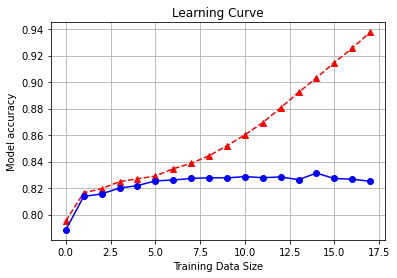

In [50]:
# по оси y откладывается величина точности, по X, количество примеров,по которым учится модель, синяя линия это проверочная ,красная train обучающая
plot_lc_cl(X,Y,np.array(range(2,20,1)))
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
